In [1]:
import warnings
warnings.simplefilter('ignore')

import sys, os
sys.path.append('../../codes/')

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import neuralNetwork as nn
import data_jupyter as data
import matplotlib.pylab as plt

#-------------------
# 0. ハイパーパラメータの設定
dataType = 7     # データの種類
updateType = 2   # 更新方法の種類
activeType = 1   # 活性化関数の種類
batchSize = 500  # バッチサイズ
hDim = 100       # 中間層のノード数
alpha = 0.1      # 学習率
rate = 0.5       # ノード選択確率（ドロップアウト）
beta = 0.5       # Adamの重み係数
isStandardize = 0 # データの標準化
#-------------------

#-------------------
# 1. データの作成
myData = data.classification(negLabel=0,posLabel=1)
myData.makeData(dataType=dataType)
#-------------------

#-------------------
# 2. データを学習と評価用に分割
if dataType == 7: # MNISTの場合
    Xtr = myData.Xtr
    Ytr = myData.Ttr
    Xte = myData.Xte
    Yte = myData.Tte
    dtrNum = len(Xtr)
    
else:
    dtrNum = int(len(myData.X)*0.9)  # 学習データ数
    # 学習データ（全体の90%）
    Xtr = myData.X[:dtrNum]
    Ytr = myData.Y[:dtrNum]

    # 評価データ（全体の10%）
    Xte = myData.X[dtrNum:]
    Yte = myData.Y[dtrNum:]
#-------------------


#-------------------
# 3. 入力データの標準化
if isStandardize:
    xMean = np.mean(Xtr,axis=0)
    xStd = np.std(Xtr,axis=0) + 10e-8
    Xtr = (Xtr-xMean)/xStd
    Xte = (Xte-xMean)/xStd
#-------------------

#-------------------
# 4. ニューラルネットワークの学習と評価
myModel = nn.neuralNetwork(Xtr,Ytr,hDim=hDim,activeType=activeType)

trLoss = []
teLoss = []
trAcc = []
teAcc = []

# バッチのインデックス
batchInd = 0

for ite in range(1001):
    # インデックスのシャッフルと初期化
    if (ite==0) or (batchInd+batchSize>=dtrNum):
        randInd = np.random.permutation(dtrNum)
        batchInd = 0

    # ミニバッチの作成
    Xbatch = Xtr[randInd[batchInd:batchInd+batchSize]]
    Ybatch = Ytr[randInd[batchInd:batchInd+batchSize]]
    batchInd += batchSize

    # 損失と正解率の記録
    trLoss.append(myModel.CE(Xbatch,Ybatch))
    teLoss.append(myModel.CE(Xte,Yte))
    trAcc.append(myModel.accuracy(Xbatch,Ybatch))
    teAcc.append(myModel.accuracy(Xte,Yte))

    # 評価の出力
    if ite%100==0:
        print(f"反復:{ite}")
        print(f"平均交差エントロピー損失={myModel.CE(Xte,Yte):.2f}")
        print(f"正解率={myModel.accuracy(Xte,Yte):.2f}")
        print("----------------")

    # パラメータの更新
    if updateType == 1:
        myModel.update(Xbatch,Ybatch,alpha=alpha)
    elif updateType == 2:
        myModel.updateDropout(Xbatch,Ybatch,alpha=alpha,rate=rate)
    elif updateType == 3:
        myModel.updateAdam(Xbatch,Ybatch,alpha=alpha,beta=beta,rate=rate)
#-------------------

反復:0
平均交差エントロピー損失=0.44
正解率=0.10
----------------
反復:100
平均交差エントロピー損失=0.78
正解率=0.18
----------------
反復:200
平均交差エントロピー損失=0.56
正解率=0.35
----------------
反復:300
平均交差エントロピー損失=0.42
正解率=0.50
----------------
反復:400
平均交差エントロピー損失=0.34
正解率=0.58
----------------
反復:500
平均交差エントロピー損失=0.28
正解率=0.63
----------------
反復:600
平均交差エントロピー損失=0.25
正解率=0.67
----------------
反復:700
平均交差エントロピー損失=0.22
正解率=0.69
----------------
反復:800
平均交差エントロピー損失=0.20
正解率=0.72
----------------
反復:900
平均交差エントロピー損失=0.18
正解率=0.73
----------------
反復:1000
平均交差エントロピー損失=0.17
正解率=0.75
----------------


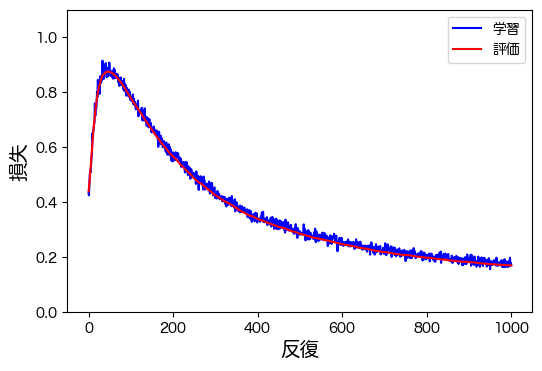

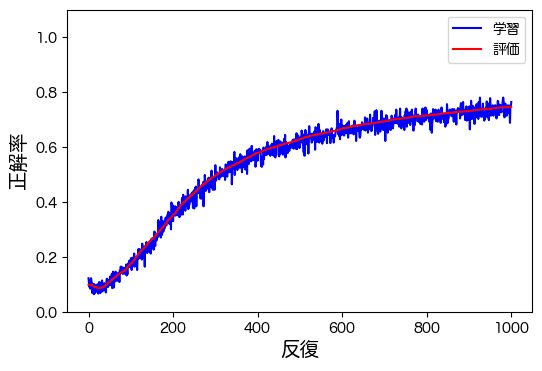

In [4]:
#-------------------
# 5. 学習と評価損失のプロット
myModel.plotEval(trLoss,teLoss,"損失")
myModel.plotEval(trAcc,teAcc,"正解率")
#-------------------

適合率	:[0.91 0.83 0.72 0.64 0.82 0.71 0.82 0.77 0.58 0.72]
再現率	:[0.81 0.96 0.7  0.74 0.65 0.56 0.81 0.81 0.71 0.67]
F1	:[0.86 0.89 0.71 0.69 0.72 0.63 0.81 0.79 0.64 0.69]
混合行列:
[[ 793    1   21   31    0   61   26   17   30    0]
 [   0 1084   10    8    3    1    6    0   21    2]
 [  13   57  723   46   12    6   46   32   88    9]
 [   7    6   39  748    1   43    8   17  133    8]
 [   0   15   44   11  634   11   35   33   50  149]
 [  35   26   15  157   14  502   28   24   75   16]
 [  14    7   74    8   11   34  776    7   25    2]
 [   2   41   46    6    7   13    4  830   27   52]
 [   6   53   12  128    4   18    9   18  694   32]
 [   4   17   17   18   88   17   11  102   56  679]]


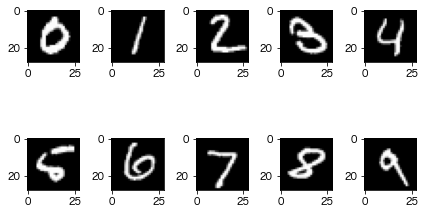

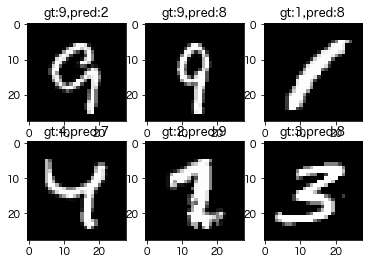

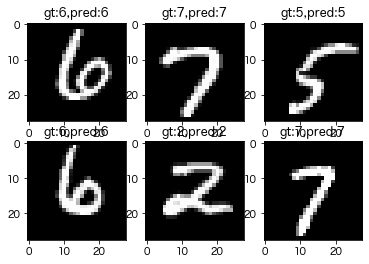

In [5]:
#-------------------
# 6. MNISTの分類結果の画像表示
if dataType == 7:
    #-------------------
    # 分類に成功・失敗したデータのインデックス取得
    
    # 予測
    P,_,_ = myModel.predict(Xte)
    
    # ラベルに変換
    P = np.argmax(P,axis=1)
    Y = np.argmax(Yte,axis=1)

    # 失敗インデックス
    fInds = np.where(Y!=P)[0]
    fInds = fInds[np.random.permutation(len(fInds))]
    
    # 成功インデックス
    sInds = np.where(Y==P)[0]
    sInds = sInds[np.random.permutation(len(sInds))]
    #-------------------

    #-------------------
    # MNIST画像のプロット
    fig = plt.figure()
    for ind in range(10):
        inds = np.where(Y==ind)[0]
        ax = fig.add_subplot(2,5,ind+1)
        ax.imshow(np.reshape(Xte[inds[0]],[28,28]),cmap="gray")

#     fName=f"../results/MNIST_examples.svg"
    plt.tight_layout()
#     plt.savefig(fName)
    #-------------------
    
    #-------------------
    # 分類に失敗した画像のプロット
    fig = plt.figure()
    for ind in range(np.min([6,len(fInds)])):
        ax = fig.add_subplot(2,3,ind+1)
        ax.imshow(np.reshape(Xte[fInds[ind]],[28,28]),cmap="gray")
        ax.set_title(f"gt:{Y[fInds[ind]]},pred:{P[fInds[ind]]}")
    
#     fName=f"../results/neuralNetFull_failed_{dataType}_{updateType}_{activeType}_{hDim}_{str(alpha).replace('.','')}_{str(rate).replace('.','')}_{str(beta).replace('.','')}_{batchSize}.pdf"
#     plt.savefig(fName)
    #-------------------

    #-------------------
    # 分類に成功した画像のプロット
    fig = plt.figure()
    for ind in range(np.min([6,len(sInds)])):
        ax = fig.add_subplot(2,3,ind+1)
        ax.imshow(np.reshape(Xte[sInds[ind]],[28,28]),cmap="gray")
        ax.set_title(f"gt:{Y[sInds[ind]]},pred:{P[sInds[ind]]}")

#     fName=f"../results/neuralNetFull_success_{dataType}_{updateType}_{activeType}_{hDim}_{str(alpha).replace('.','')}_{str(rate).replace('.','')}_{str(beta).replace('.','')}_{batchSize}.pdf"
#     plt.savefig(fName)
    #-------------------
#-------------------